## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)
print(y_train.shape) #(50000, 1)
print(x_test.shape)  #(10000, 32, 32, 3)
print(y_test.shape)  #(10000, 1)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([y[0] for y in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[y[0]] for y in y_train[0:10]]))


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


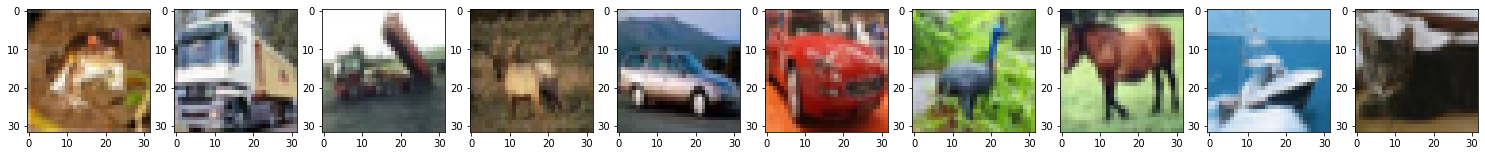

In [4]:
n = 10
f, axarr = plt.subplots(1, n)
f.set_size_inches(26, n)

for i in range(n):
    img = x_train[i]
    #print(img)
    axarr[i].imshow(img)
plt.show()


In [5]:
## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train, axis=(0,1,2,3))
        std = np.std(X_train, axis=(0,1,2,3))
        X_train = (X_train - mean) / (std + 1e-7)
        X_test = (X_test - mean) / (std + 1e-7) 
        return X_train, X_test, mean, std
    
    
## Normalize Training and Testset    
x_train, x_test, mean_train, std_train = normalize(x_train, x_test) 


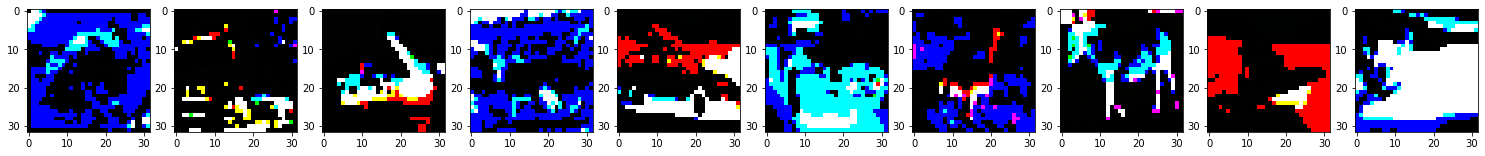

In [6]:
n = 10
f, axarr = plt.subplots(1, n)
f.set_size_inches(26, n)

for i in range(n):
    img = (x_train[i]).astype('uint8')
    axarr[i].imshow(img, vmin=0, vmax=255)
plt.show()

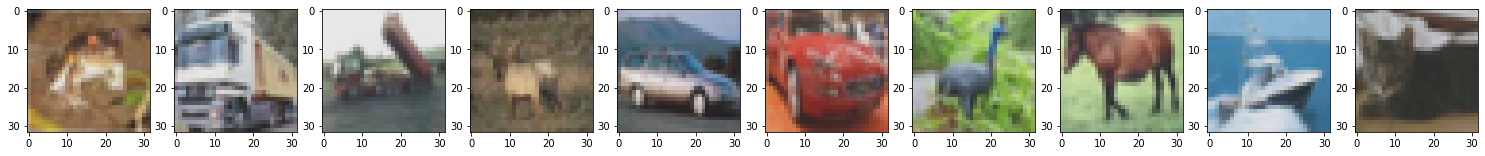

In [7]:
n = 10
f, axarr = plt.subplots(1, n)
f.set_size_inches(26, n)

for i in range(n):
    img = (x_train[i]*50 + 128).astype('uint8')
    axarr[i].imshow(img, vmin=0, vmax=255)
plt.show()


In [8]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot = OneHotEncoder()

print(y_train.shape) #(50000, 1)
print(y_test.shape)  #(10000, 1)

y_train = one_hot.fit_transform(y_train).toarray()
y_test = one_hot.transform(y_test).toarray()

print(y_train.shape) #(50000, 1)
print(y_test.shape)  #(10000, 1)


(50000, 1)
(10000, 1)
(50000, 10)
(10000, 10)


In [9]:

classifier=Sequential()

#卷積組合
#classifier.add(Convolution2D('自己設計參數'))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(Convolution2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
classifier.add(BatchNormalization())

'''自己決定MaxPooling2D放在哪裡'''
#classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#卷積組合
#classifier.add(Convolution2D('自己設計參數'))
classifier.add(Convolution2D(64,(3,3)))
classifier.add(BatchNormalization())

#flatten
classifier.add(Flatten())

#FC
#classifier.add(Dense('自己設計FC層參數')) #output_dim=100,activation=relu
#classifier.add(Dense(output_dim=100,activation='relu'))
classifier.add(Dense(units=100, activation='relu')) 

#輸出
#classifier.add(Dense(output_dim=10,activation='輸出函數應該用什麼？'))
classifier.add(Dense(units=10, activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

In [10]:
classifier.fit(x_train, y_train, batch_size=100, epochs=10)


Epoch 1/10
50000/50000 [==============================] - 15s 306us/step - loss: 1.4791 - accuracy: 0.5272
Epoch 2/10
50000/50000 [==============================] - 12s 235us/step - loss: 0.9135 - accuracy: 0.6822
Epoch 3/10
50000/50000 [==============================] - 12s 234us/step - loss: 0.7263 - accuracy: 0.7435
Epoch 4/10
50000/50000 [==============================] - 11s 230us/step - loss: 0.5778 - accuracy: 0.7989
Epoch 5/10
50000/50000 [==============================] - 12s 232us/step - loss: 0.4726 - accuracy: 0.8323
Epoch 6/10
50000/50000 [==============================] - 12s 231us/step - loss: 0.3670 - accuracy: 0.8709
Epoch 7/10
50000/50000 [==============================] - 12s 234us/step - loss: 0.2914 - accuracy: 0.8985
Epoch 8/10
50000/50000 [==============================] - 12s 231us/step - loss: 0.2327 - accuracy: 0.9181
Epoch 9/10
50000/50000 [==============================] - 12s 231us/step - loss: 0.2011 - accuracy: 0.9296
Epoch 10/10
50000/50000 [============

In [11]:
classifier.save('KerasCifar10.h5')

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

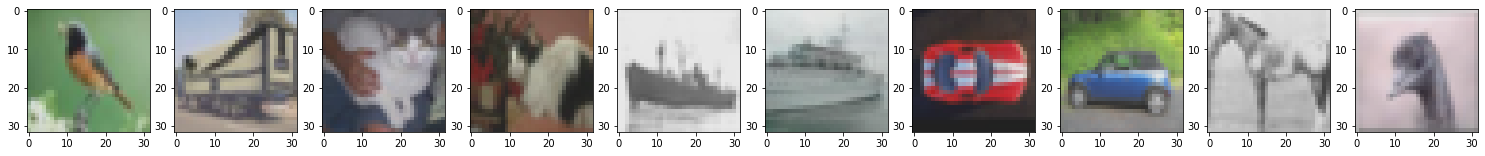

In [21]:
n, s = 10, 75
f, axarr = plt.subplots(1, n)
f.set_size_inches(26, n)

for i in range(n):
    #img = x_test[i+s]
    img = (x_test[i+s]*50 + 128).astype('uint8')
    #axarr[i].imshow(img)
    axarr[i].imshow(img, vmin=0, vmax=255)
plt.show()


In [22]:
from keras.models import load_model
model = load_model('KerasCifar10.h5')


In [23]:
n, s = 10, 75

input_example = (np.zeros(shape=(1,32,32,3)) - mean_train)/(std_train + 1e-7)
print(input_example.shape)
print(x_test.shape)
print(x_test[s:s+n,:,:,:].shape)

#p = classifier.predict(input_example)
#p = classifier.predict(x_test[s:s+n,:,:,:])
p = model.predict(x_test[s:s+n,:,:,:])
print(p.shape)
    
for i in range(n):
    print('\nPic[%2d]' % i)
    for j in range(10):
        print (' %10s : pred=%2.8f, real=%1d' % (cifar_classes[j], p[i,j], y_test[s+i,j]))


(1, 32, 32, 3)
(10000, 32, 32, 3)
(10, 32, 32, 3)
(10, 10)

Pic[ 0]
   airplane : pred=0.00000002, real=0
 automobile : pred=0.00000000, real=0
       bird : pred=0.99999022, real=1
        cat : pred=0.00000000, real=0
       deer : pred=0.00000836, real=0
        dog : pred=0.00000143, real=0
       frog : pred=0.00000000, real=0
      horse : pred=0.00000000, real=0
       ship : pred=0.00000000, real=0
      truck : pred=0.00000000, real=0

Pic[ 1]
   airplane : pred=0.35711354, real=0
 automobile : pred=0.00000014, real=0
       bird : pred=0.64286512, real=0
        cat : pred=0.00000000, real=0
       deer : pred=0.00000000, real=0
        dog : pred=0.00000000, real=0
       frog : pred=0.00000000, real=0
      horse : pred=0.00002071, real=0
       ship : pred=0.00000001, real=0
      truck : pred=0.00000042, real=1

Pic[ 2]
   airplane : pred=0.00003286, real=0
 automobile : pred=0.00001375, real=0
       bird : pred=0.01886309, real=0
        cat : pred=0.96991682, real=1
  

In [28]:
scores1 = model.evaluate(x_test[s:s+n,:,:,:], y_test[s:s+n,:], verbose=1)
print('Test loss:', scores1[0])
print('Test accuracy:', scores1[1])
print()

scores2 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores2[0])
print('Test accuracy:', scores2[1])
print()

scores3 = model.evaluate(x_train, y_train, verbose=1)
print('Test loss:', scores3[0])
print('Test accuracy:', scores3[1])


10/10 [==============================] - 0s 1ms/step
Test loss: 1.7849174737930298
Test accuracy: 0.699999988079071

10000/10000 [==============================] - 5s 525us/step
Test loss: 1.9434199586868286
Test accuracy: 0.6452999711036682

50000/50000 [==============================] - 26s 528us/step
Test loss: 0.17342841896295547
Test accuracy: 0.9387999773025513
